In [9]:

import matplotlib.pyplot as plt




In [46]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               285 non-null    object 
 1   lat                285 non-null    float64
 2   lng                285 non-null    float64
 3   country            285 non-null    object 
 4   iso2               285 non-null    object 
 5   admin_name         285 non-null    object 
 6   capital            40 non-null     object 
 7   population         285 non-null    int64  
 8   population_proper  285 non-null    int64  
 9   first_digit        285 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 22.4+ KB


,lat,lng,population,population_proper,first_digit
count,285.000000,285.000000,2.850000e+02,2.850000e+02,285.000000
mean,39.965883,-1.742059,1.204302e+05,8.864604e+04,3.192982
std,2.808996,3.740694,4.854228e+05,2.382242e+05,2.491101
min,27.983300,-16.666700,1.033000e+03,1.033000e+03,1.000000
25%,38.880300,-3.800000,1.173600e+04,1.173600e+04,1.000000
50%,40.466700,-0.796700,2.783400e+04,2.783400e+04,2.000000
75%,41.583300,1.633300,8.729500e+04,8.607000e+04,5.000000
max,43.556100,3.163100,6.211000e+06,3.266126e+06,9.000000


In [47]:
df.describe()

,lat,lng,population,population_proper,first_digit
count,285.000000,285.000000,2.850000e+02,2.850000e+02,285.000000
mean,39.965883,-1.742059,1.204302e+05,8.864604e+04,3.192982
std,2.808996,3.740694,4.854228e+05,2.382242e+05,2.491101
min,27.983300,-16.666700,1.033000e+03,1.033000e+03,1.000000
25%,38.880300,-3.800000,1.173600e+04,1.173600e+04,1.000000
50%,40.466700,-0.796700,2.783400e+04,2.783400e+04,2.000000
75%,41.583300,1.633300,8.729500e+04,8.607000e+04,5.000000
max,43.556100,3.163100,6.211000e+06,3.266126e+06,9.000000


In [10]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1hlm7hiAGniIMuMnKcNlQ1YRqBr8b_koJ")
df.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Madrid,40.4169,-3.7033,Spain,ES,Madrid,primary,6211000,3266126
1,Barcelona,41.3828,2.1769,Spain,ES,Catalonia,admin,4800000,1620343
2,Valencia,39.4700,-0.3764,Spain,ES,Valencia,admin,1595000,807693
3,Sevilla,37.3900,-5.9900,Spain,ES,Andalusia,admin,1100000,684025
4,Málaga,36.7194,-4.4200,Spain,ES,Andalusia,minor,967250,586384


In [11]:

df = df[df['population'] > 0]
df = df.dropna(subset=['population'])

df['population'].describe()


,population
count,2.850000e+02
mean,1.204302e+05
std,4.854228e+05
min,1.033000e+03
25%,1.173600e+04
50%,2.783400e+04
75%,8.729500e+04
max,6.211000e+06


In [12]:

df['first_digit'] = df['population'].astype(str).str[0].astype(int)


In [13]:

actual_dist = df['first_digit'].value_counts(normalize=True).sort_index()

benford_dist = [np.log10(1 + 1/d) for d in range(1, 10)]
digits = list(range(1, 10))


In [14]:
from scipy.stats import chisquare


total = len(df)
expected_counts = [p * total for p in benford_dist]
actual_counts = df['first_digit'].value_counts().sort_index().reindex(digits, fill_value=0).values

chi_stat, p_value = chisquare(actual_counts, f_exp=expected_counts)

print(f"Chi-Square Statistic: {chi_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


Chi-Square Statistic: 15.92
P-Value: 0.0436


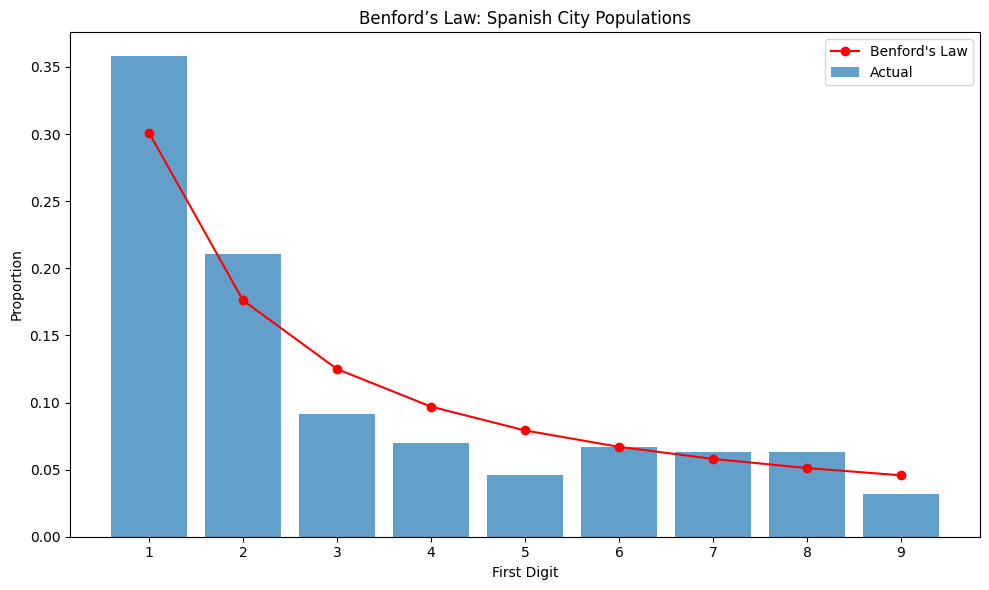

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(digits, actual_dist.reindex(digits, fill_value=0), label='Actual', alpha=0.7)
plt.plot(digits, benford_dist, 'ro-', label="Benford's Law")
plt.title("Benford’s Law: Spanish City Populations")
plt.xlabel("First Digit")
plt.ylabel("Proportion")
plt.xticks(digits)
plt.legend()
plt.tight_layout()
plt.show()



In [16]:
observed_counts_population = [
    list(df['first_digit']).count(d) for d in digits
]
total_records_population = len(df['first_digit'])
expected_counts_population = [
    int(total_records_population * np.log10(1 + 1 / d)) for d in digits
]

In [38]:
sorted_df = df.sort_values(by="population", ascending=False)
sorted_df.head(10)


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,first_digit
0,Madrid,40.4169,-3.7033,Spain,ES,Madrid,primary,6211000,3266126,6
1,Barcelona,41.3828,2.1769,Spain,ES,Catalonia,admin,4800000,1620343,4
2,Valencia,39.4700,-0.3764,Spain,ES,Valencia,admin,1595000,807693,1
3,Sevilla,37.3900,-5.9900,Spain,ES,Andalusia,admin,1100000,684025,1
4,Málaga,36.7194,-4.4200,Spain,ES,Andalusia,minor,967250,586384,9
5,Bilbao,43.2569,-2.9236,Spain,ES,Basque Country,minor,775000,346096,7
6,Zaragoza,41.6500,-0.8833,Spain,ES,Aragon,admin,682513,682513,6
7,Murcia,37.9861,-1.1303,Spain,ES,Murcia,admin,672773,469177,6
8,Las Palmas,28.1258,-15.4353,Spain,ES,Canary Islands,admin,635000,635000,6
9,Palma,39.5667,2.6500,Spain,ES,Balearic Islands,admin,550000,423350,5


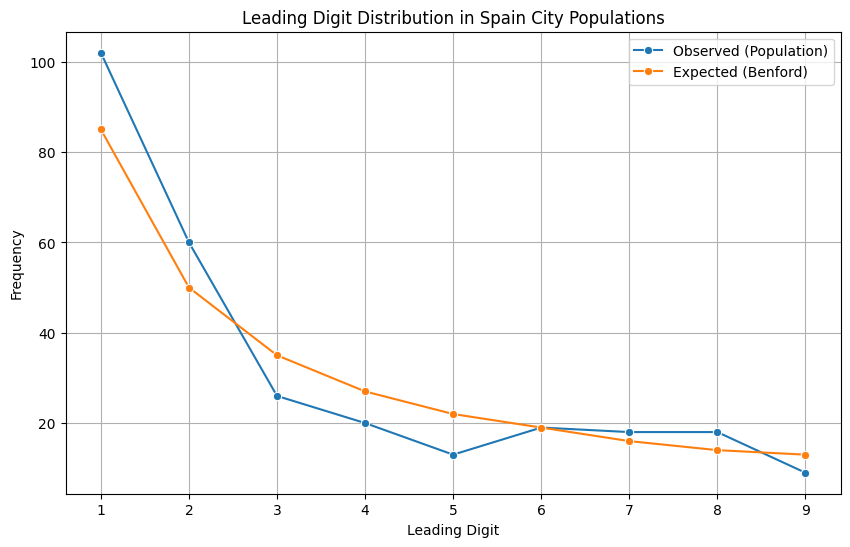

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=digits, y=observed_counts_population, label="Observed (Population)", marker="o")
sns.lineplot(x=digits, y=expected_counts_population, label="Expected (Benford)", marker="o")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution in Spain City Populations")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import numpy as np

digits = list(range(1, 10))


benford_probs = [np.log10(1 + 1/d) for d in digits]



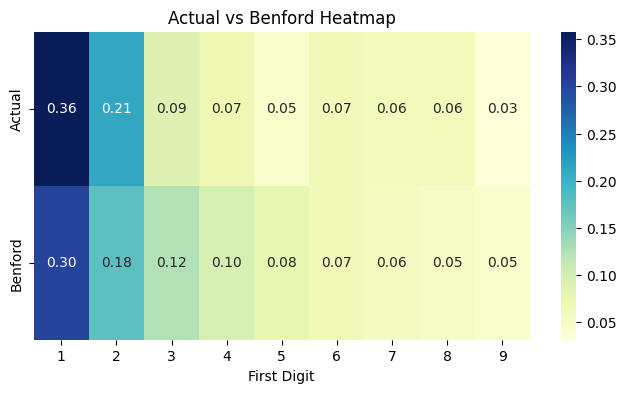

In [29]:
comparison_df = pd.DataFrame({
    'Actual': actual_dist.values,
    'Benford': benford_probs
}, index=digits)

plt.figure(figsize=(8, 4))
sns.heatmap(comparison_df.T, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Actual vs Benford Heatmap")
plt.xlabel("First Digit")
plt.show()


In [41]:
from scipy.stats import chisquare

# Align actual with all digits 1–9
actual_counts = df['first_digit'].value_counts().sort_index()
actual_counts = actual_counts.reindex(digits, fill_value=0)

expected_counts = [p * len(df) for p in benford_probs]

chi_stat, p_val = chisquare(f_obs=actual_counts, f_exp=expected_counts)
print("Chi-square Statistic:", chi_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("The population data does NOT follow Benford’s Law.")
else:
    print("The population data follows Benford’s Law.")


Chi-square Statistic: 15.91700406169193
P-value: 0.043583561728750844
The population data does NOT follow Benford’s Law.


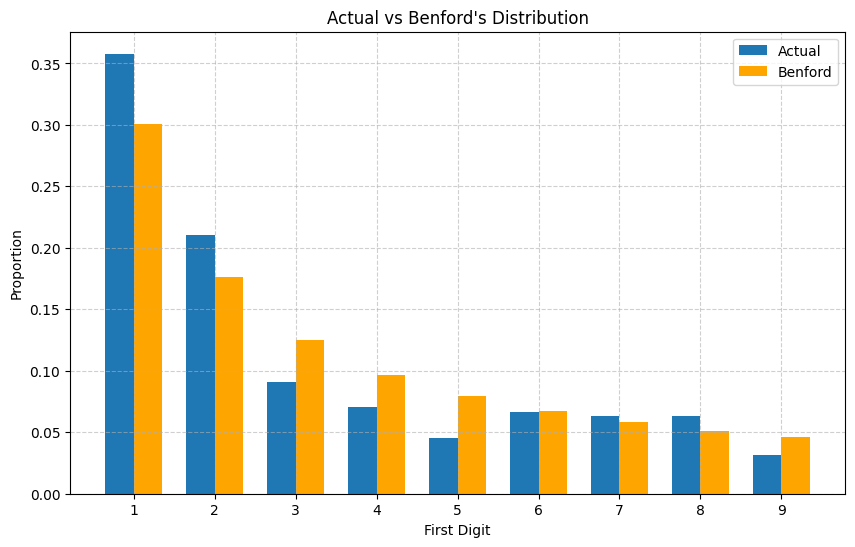

In [31]:
x = np.arange(len(digits))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, actual_dist.values, width, label="Actual")
plt.bar(x + width/2, benford_probs, width, label="Benford", color="orange")
plt.xlabel("First Digit")
plt.ylabel("Proportion")
plt.title("Actual vs Benford's Distribution")
plt.xticks(x, digits)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<ipython-input-32-d913d3f3642e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='population', y='city', data=top_cities, palette="viridis")


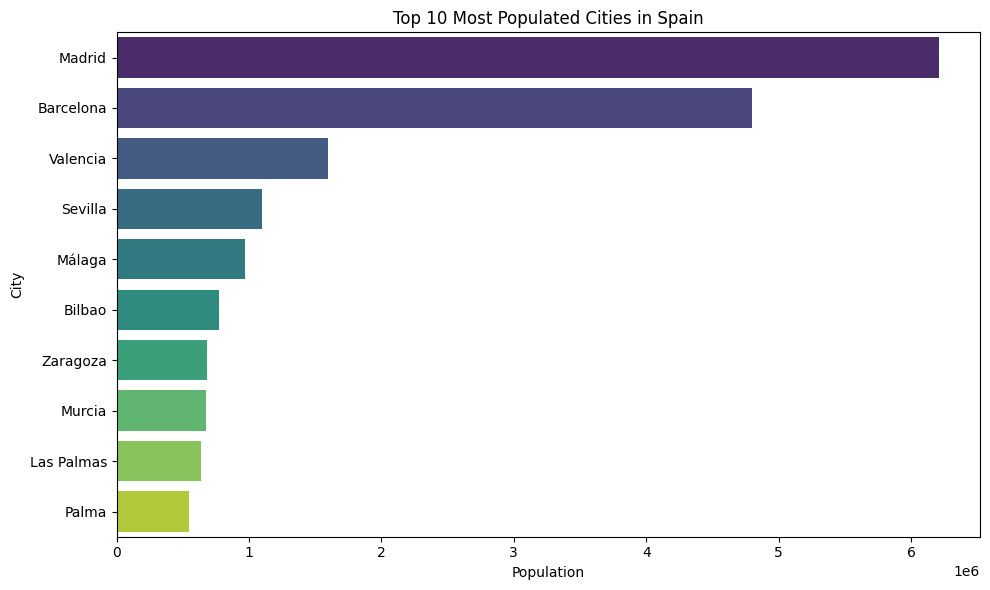

In [32]:
top_cities = df.sort_values(by='population', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='population', y='city', data=top_cities, palette="viridis")
plt.title("Top 10 Most Populated Cities in Spain")
plt.xlabel("Population")
plt.ylabel("City")
plt.tight_layout()
plt.show()


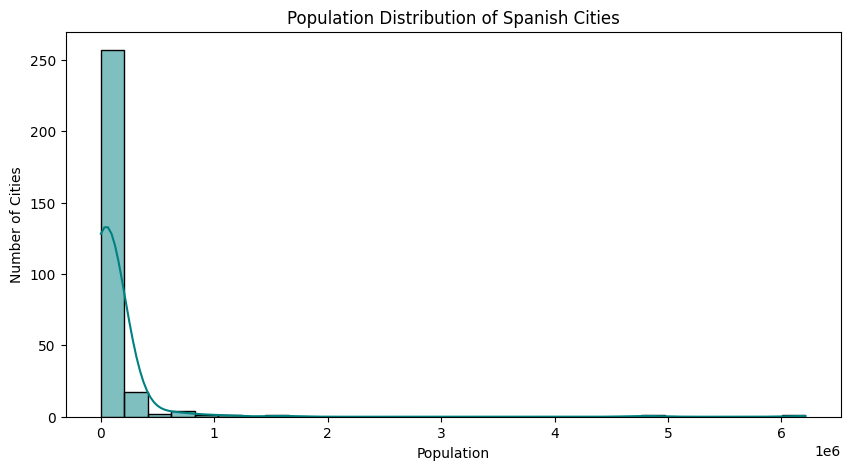

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df['population'], bins=30, kde=True, color='teal')
plt.title("Population Distribution of Spanish Cities")
plt.xlabel("Population")
plt.ylabel("Number of Cities")
plt.show()


In [42]:
comparison_df = pd.DataFrame({
    "Digit": digits,
    "Actual Count": actual_counts.values,
    "Expected Count (Benford)": expected_counts,
    "Difference": actual_counts.values - expected_counts
})
comparison_df


,Digit,Actual Count,Expected Count (Benford),Difference
0,1,102,85.793549,16.206451
1,2,60,50.186009,9.813991
2,3,26,35.607540,-9.607540
3,4,20,27.619354,-7.619354
4,5,13,22.566655,-9.566655
5,6,19,19.079835,-0.079835
6,7,18,16.527705,1.472295
7,8,18,14.578469,3.421531
8,9,9,13.040885,-4.040885


In [44]:
import numpy as np

digits = list(range(1, 10))
benford_probs = [np.log10(1 + 1/d) for d in digits]

benford_df = pd.DataFrame({
    "Digit": digits,
    "Benford Probability": benford_probs
})
benford_df


,Digit,Benford Probability
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


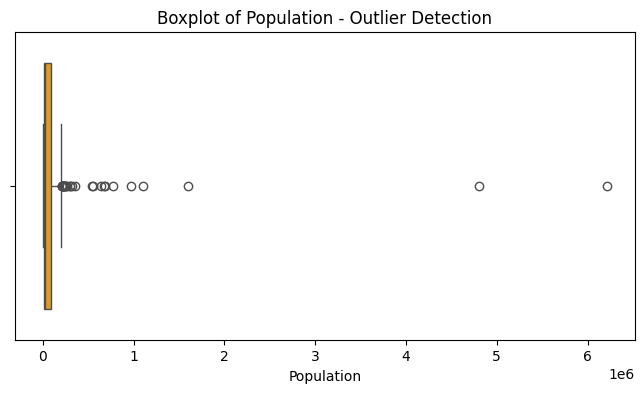

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['population'], color='orange')
plt.title("Boxplot of Population - Outlier Detection")
plt.xlabel("Population")
plt.show()


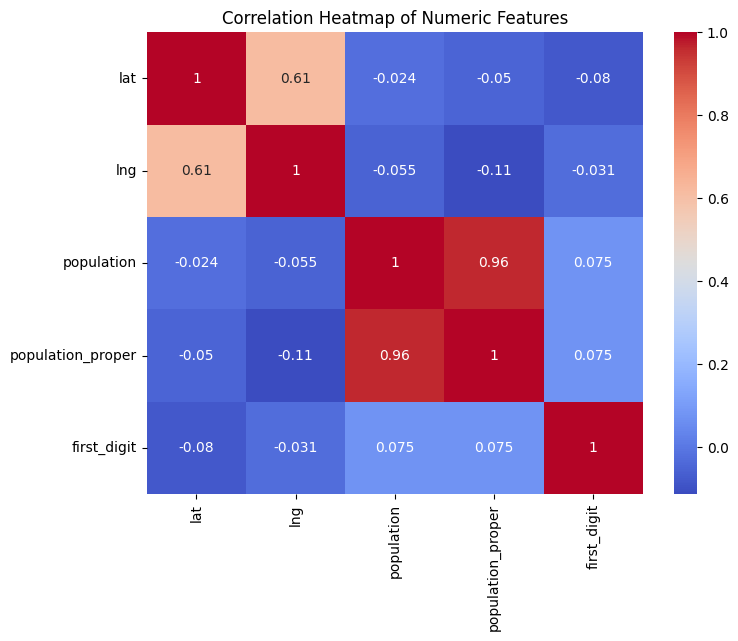

In [35]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [36]:
leading_digit_counts = df['first_digit'].value_counts().sort_index()
leading_digit_table = pd.DataFrame({
    "Digit": leading_digit_counts.index,
    "Actual Count": leading_digit_counts.values,
    "Expected Count (Benford)": [int(len(df) * prob) for prob in benford_probs]
})
leading_digit_table["Difference"] = leading_digit_table["Actual Count"] - leading_digit_table["Expected Count (Benford)"]
leading_digit_table


,Digit,Actual Count,Expected Count (Benford),Difference
0,1,102,85,17
1,2,60,50,10
2,3,26,35,-9
3,4,20,27,-7
4,5,13,22,-9
5,6,19,19,0
6,7,18,16,2
7,8,18,14,4
8,9,9,13,-4


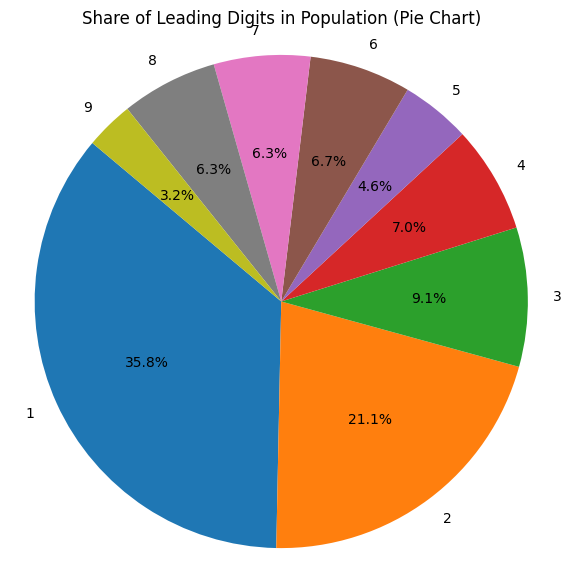

In [37]:
plt.figure(figsize=(7, 7))
plt.pie(leading_digit_counts.values, labels=leading_digit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Leading Digits in Population (Pie Chart)")
plt.axis('equal')
plt.show()


In [45]:
big_cities = df[df["population"] > 1_000_000]
big_cities


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,first_digit
0,Madrid,40.4169,-3.7033,Spain,ES,Madrid,primary,6211000,3266126,6
1,Barcelona,41.3828,2.1769,Spain,ES,Catalonia,admin,4800000,1620343,4
2,Valencia,39.4700,-0.3764,Spain,ES,Valencia,admin,1595000,807693,1
3,Sevilla,37.3900,-5.9900,Spain,ES,Andalusia,admin,1100000,684025,1
